In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Exploratory Data Analysis Notebook

## Load and Prepare Data

In [4]:
df = pd.read_parquet('GenericMixOfTopic.parquet')

## Basic Dataset Properties
An exploration of the dataset's basic properties

### Dataset Shape

In [47]:
df.shape

(200005, 5)

In [48]:
df.head()

,id,title,topic,topics_with_percentages,text
0,44579372,Julius Julskötare,Mixed,"b'{""Entertainment"":0.67,""Culture"":0.17,""Mass_m...",'Julius Julskötare' (&quot;Julius Christmas ...
1,69360653,Josia Topf,Mixed,"b'{""People"":0.5,""Sports"":0.5,""Academic_discipl...",Infobox athlete | name Josia Topf | fullname...
2,41642068,St. Peter Chaldean Catholic Cathedral (El Cajo...,Mixed,"b'{""Religion"":0.36,""Culture"":0.21,""Time"":0.14,...",St. Peter Cathedral is a Chaldean Catholic C...
3,4351257,Allahabad Address,Mixed,"b'{""History"":0.3,""Government"":0.2,""Philosophy""...","File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,..."
4,648505,Glomerulus (olfaction),Academic_disciplines,"b'{""Academic_disciplines"":1.0,""Business"":0,""Co...",The glomerulus (plural glomeruli) is a spher...


### Missing and Null Values
No missing values found.

In [49]:
df.isnull().sum()

id                         0
title                      0
topic                      0
topics_with_percentages    0
text                       0
dtype: int64

### Duplicates
There are no duplicates in the dataset.

In [50]:
df.duplicated().sum()

0

### Columns, names and range

The name of the 5 columns

In [51]:
df.columns

Index(['id', 'title', 'topic', 'topics_with_percentages', 'text'], dtype='object')

**ID column**

In [52]:
print(f"The min value is: {df['id'].astype(int).min()} and the max value is {df['id'].astype(int).max()}")

The min value is: 766 and the max value is 73935970


**Title Column**

In [53]:
print(f"There are {df['title'].unique().shape[0]} unique titles")
print(f"The shortest title is: {df['title'].apply(len).min()} charachters and the longest title is {df['title'].apply(len).max()} charachters")

There are 200005 unique titles
The shortest title is: 1 charachters and the longest title is 162 charachters


In [54]:
# 5 shortest titles
shortest_titles = df['title'].apply(len).sort_values().head(5)
print("5 Shortest Titles:")
df.iloc[shortest_titles.index, :]


5 Shortest Titles:


,id,title,topic,topics_with_percentages,text
79805,4273681,Ṡ,Concepts,"b'{""Concepts"":1.0,""Academic_disciplines"":0,""Bu...",Ṡ (lowercase: ṡ or ẛ) is a letter of the ext...
61613,3010719,Ȥ,Concepts,"b'{""Concepts"":1.0,""Academic_disciplines"":0,""Bu...","Z with hook, Ȥ ( Lower case|minuscule : ȥ) i..."
3972,258680,Ĥ,Mixed,"b'{""Language"":0.5,""Concepts"":0.5,""Academic_dis...",Ĥ or ĥ is a letter of some extended Latin al...
11164,208171,6,Mathematics,"b'{""Mathematics"":1.0,""Academic_disciplines"":0,...",6 (six) is the natural number following 5 an...
1232,60148151,Ꞩ,Mixed,"b'{""Humanities"":0.5,""Language"":0.5,""Academic_d...","Ꞩ, ꞩ, ẜ (S with oblique stroke) is an extend..."


In [55]:
# 5 longest titles
longest_titles = df['title'].apply(len).sort_values(ascending=False).head(5)
print("\n5 Longest Titles:")
df.iloc[longest_titles.index, :]
print(df.iloc[longest_titles.index, [1,4]].to_markdown(index=False))


5 Longest Titles:
| title                                                                                                                                                              | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

**Topic Column**

In [56]:
print(f"There are {df['topic'].unique().shape[0]} unique topics")

# 5 most common topics
most_common_topics = df['topic'].value_counts().head(5)
print("\n5 Most Common Topics:")
most_common_topics

There are 40 unique topics

5 Most Common Topics:


topic
Mixed        170000
Knowledge       825
Business        825
Politics        825
Military        825
Name: count, dtype: int64

In [57]:
# Set the font sizes
plt.rcParams.update({'font.size': 12})  # Adjust base font size as needed
plt.rcParams['axes.titlesize'] = 14   # Title font size
plt.rcParams['axes.labelsize'] = 12   # Axis labels font size
plt.rcParams['xtick.labelsize'] = 10  # X ticks labels font size
plt.rcParams['ytick.labelsize'] = 10  # Y ticks labels font size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

In [12]:
topic_counts = df['topic'].value_counts()
topic_counts = topic_counts.drop("Mixed")
topic_counts

topic
Knowledge               825
Business                825
Politics                825
Military                825
Mass_media              825
History                 825
Language                825
Engineering             825
Internet                825
Nature                  825
Economy                 825
Entertainment           825
Geography               825
Information             825
Time                    825
Life                    825
Academic_disciplines    825
Law                     825
People                  825
Science                 825
Society                 825
Human_behavior          825
Mathematics             825
Technology              825
Religion                825
Government              825
Health                  825
Food_and_drink          825
Energy                  825
Humanities              825
Culture                 825
Concepts                825
Education               825
Sports                  825
Entities                756
Universe      

In [43]:
topic_plot_data = topic_counts[-6:]
temp_indexes = topic_plot_data.index.tolist()
temp_indexes[0] = "Others"
topic_plot_data.index = temp_indexes
topic_plot_data

Others           825
Entities         756
Universe         413
Philosophy       362
Communication    288
Ethics           136
Name: count, dtype: int64

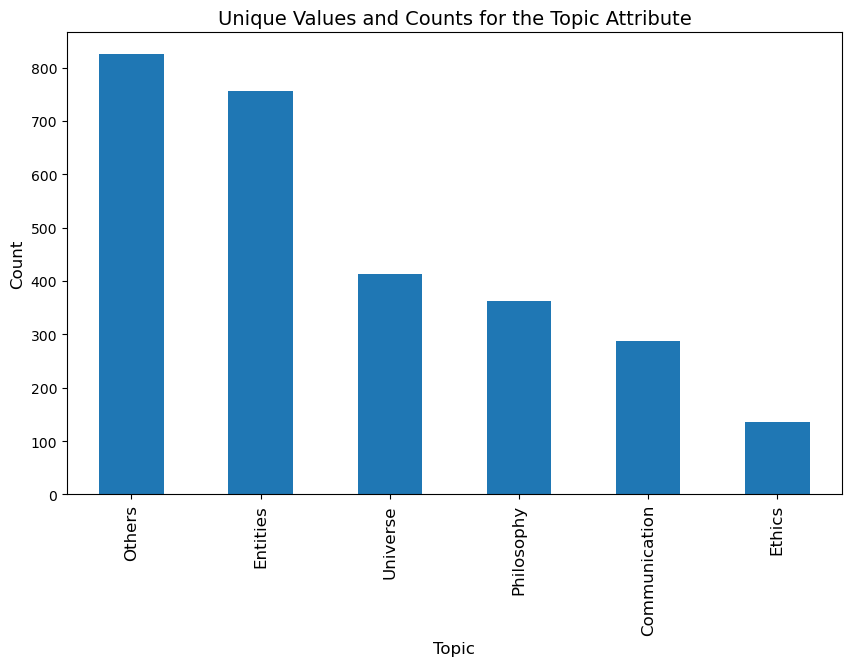

In [45]:
# Create a bar chart
plt.figure(figsize=(10, 6))
topic_plot_data.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Unique Values and Counts for the Topic Attribute')
plt.show()

**Topics With Percentages**

In [5]:
df['topics_with_percentages'] = df['topics_with_percentages'].apply(lambda x: json.loads(x))
probability_sums = df['topics_with_percentages'].apply(lambda x: sum(x.values()))
print(f"The min value is: {probability_sums.min()} and the max value is {probability_sums.max()}")

print(f"There are {probability_sums[probability_sums != 1].shape[0]} rows where the sum of the probabilities is not equal to 1")

The min value is: 0.9500000000000001 and the max value is 1.0400000000000005
There are 85619 rows where the sum of the probabilities is not equal to 1


**Text Column**

In [60]:
print(f"There are {df['text'].unique().shape[0]} unique text")
print(f"The shortest text is: {df['text'].apply(len).min()} charachters and the longest text is {df['text'].apply(len).max()} charachters")

There are 200003 unique text
The shortest text is: 73 charachters and the longest text is 406885 charachters


There are 2 duplicates that are the below rows:

In [61]:
df[df.duplicated(subset=['text'], keep=False)].sort_values(by='text')

,id,title,topic,topics_with_percentages,text
35137,69790403,List of number-one albums of 2022 (Spain),Mixed,"{'Entertainment': 0.33, 'History': 0.33, 'Time...",Top 100 España is a record chart published w...
199699,66437291,List of number-one albums of 2021 (Spain),Mixed,"{'Entertainment': 0.33, 'History': 0.33, 'Time...",Top 100 España is a record chart published w...
116130,19260898,Takasu Station (Kōchi),Economy,"{'Economy': 1.0, 'Academic_disciplines': 0, 'B...","is a tram station in Kōchi, Kōchi|Kōchi , Ja..."
180166,19260880,Monju-dōri Station,Economy,"{'Economy': 1.0, 'Academic_disciplines': 0, 'B...","is a tram station in Kōchi, Kōchi|Kōchi , Ja..."


Shortest Texts:

In [62]:
df.iloc[df['text'].apply(len).sort_values(ascending=True).head(5).index, :]

,id,title,topic,topics_with_percentages,text
70683,44857967,"County Road 581 (Citrus County, Florida)",Government,"{'Government': 1.0, 'Academic_disciplines': 0,...",#REDIRECT List of county roads in Citrus Coun...
193003,43449692,454th (City of London) Heavy Anti-Aircraft Reg...,Military,"{'Military': 1.0, 'Academic_disciplines': 0, '...",#REDIRECT 54th (City of London) Heavy Anti-Ai...
6052,273227,Subclass (biology),Life,"{'Life': 1.0, 'Academic_disciplines': 0, 'Busi...",#REDIRECT Class (biology)#Hierarchy of ranks ...
92458,33895594,TAM (theatre),Culture,"{'Culture': 1.0, 'Academic_disciplines': 0, 'B...","TAM (Theater) is a theatre in Krefeld , Nort..."
142672,55814828,ČSA Flight 511,Nature,"{'Nature': 1.0, 'Academic_disciplines': 0, 'Bu...",ČSA Flight 511 may refer to: ČSA Flight 511 (...


In [63]:
# Shortest 5 texts
print(df.iloc[df['text'].apply(len).sort_values(ascending=True).head(5).index, 4].to_markdown(index=False))

| text                                                                                |
|:------------------------------------------------------------------------------------|
| #REDIRECT List of county roads in Citrus County, Florida#County Road 581            |
| #REDIRECT 54th (City of London) Heavy Anti-Aircraft Regiment, Royal Artillery       |
| #REDIRECT Class (biology)#Hierarchy of ranks below and above the level of class     |
| TAM (Theater) is a theatre in Krefeld , North Rhine-Westphalia , Germany . </text>  |
| ČSA Flight 511 may refer to: ČSA Flight 511 (March 1961) ČSA Flight 511 (July 1961) |


# Label Distribution
Looking at the distribution of labels, there is evident label inbalance.
- Some labels have below 10000 instances.
- People Label has more than 70000 Instances.

In [6]:
# Create a new DataFrame containing only the labels
labels_df = pd.DataFrame(df['topics_with_percentages'].tolist())

## Distribution with 0 Threshold

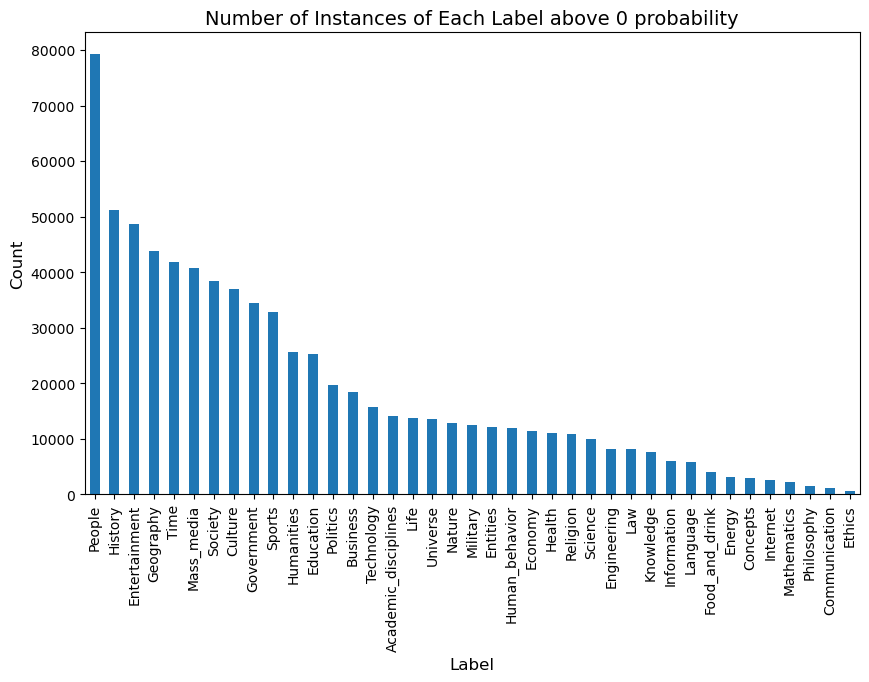

In [65]:
labels_df_above_0 = labels_df.applymap(lambda x: 1 if x > 0 else 0)

sums = labels_df_above_0.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label above 0 probability')
plt.show()

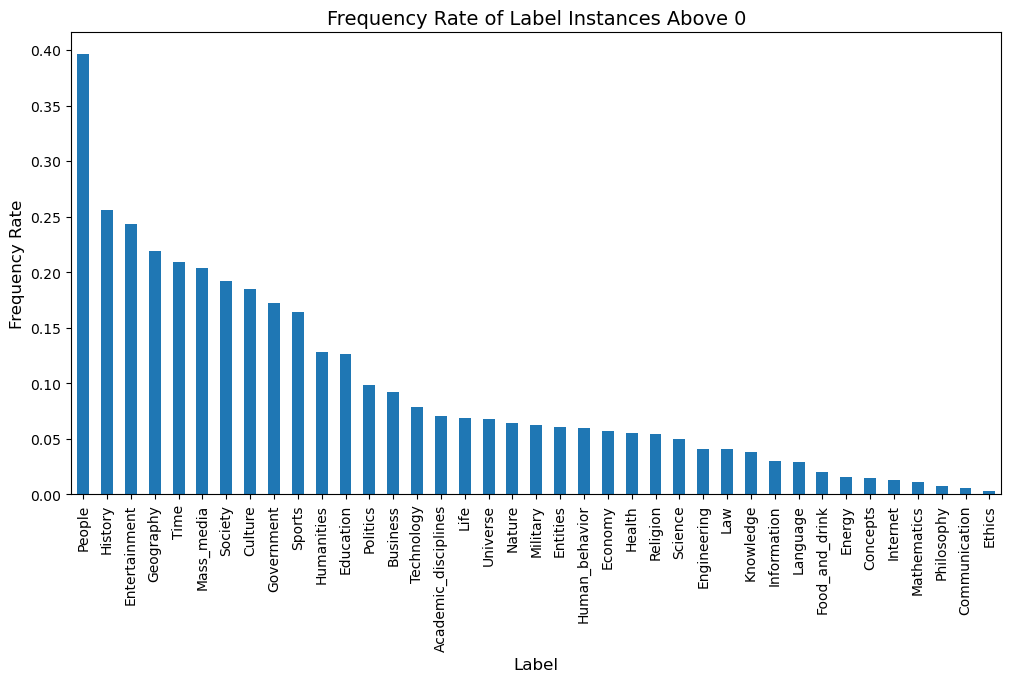

In [66]:
# Calculate the frequency rate
frequency_rate = labels_df_above_0.sum() / len(labels_df_above_0)
frequency_rate = frequency_rate.sort_values(ascending=False)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Instances Above 0')
plt.xlabel('Label')
plt.ylabel('Frequency Rate')
plt.show()

## Distribution with 0.11 Threshold

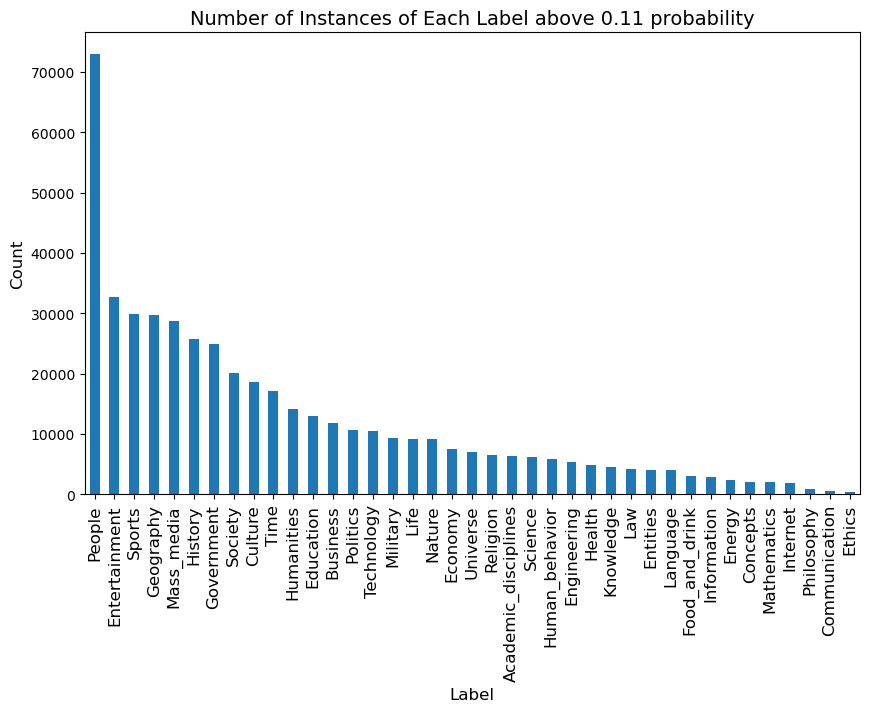

In [31]:
labels_df_above_0_11 = labels_df.applymap(lambda x: 1 if x > 0.11 else 0)

sums = labels_df_above_0_11.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label above 0.11 probability')
plt.show()

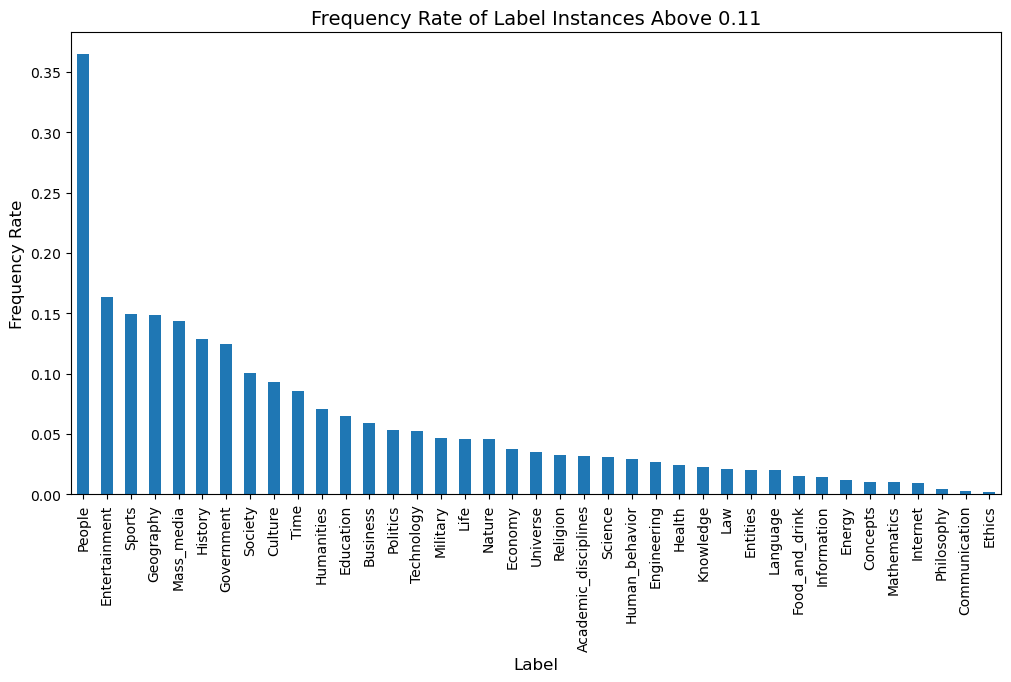

In [68]:
# Calculate the frequency rate
frequency_rate = labels_df_above_0_11.sum() / len(labels_df_above_0_11)
frequency_rate = frequency_rate.sort_values(ascending=False)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Instances Above 0.11')
plt.xlabel('Label')
plt.ylabel('Frequency Rate')
plt.show()

## Distribution with 0.3 Threshold

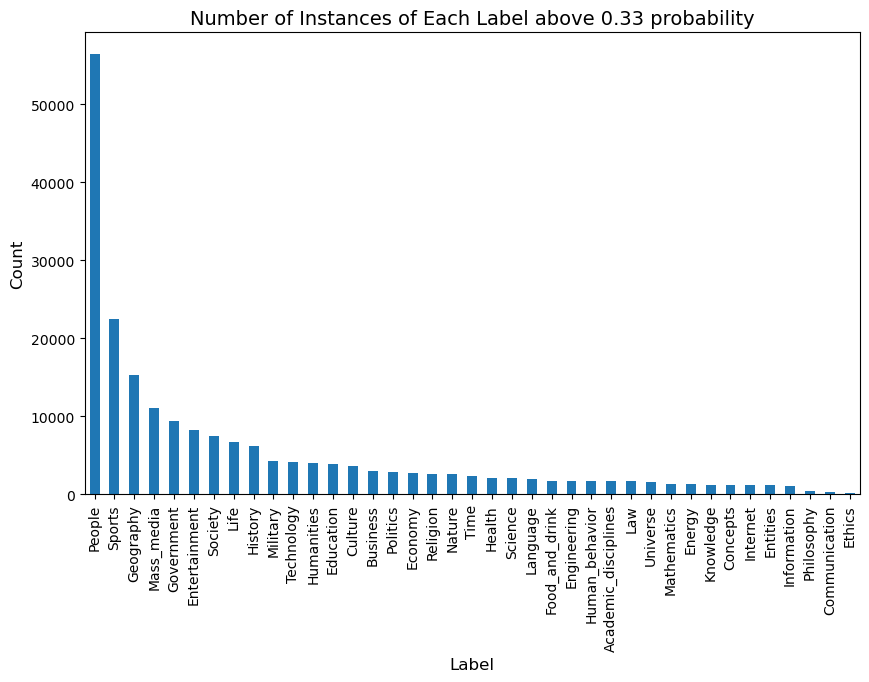

In [69]:
labels_df_above_0_33 = labels_df.applymap(lambda x: 1 if x > 0.33 else 0)

sums = labels_df_above_0_33.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label above 0.33 probability')
plt.show()

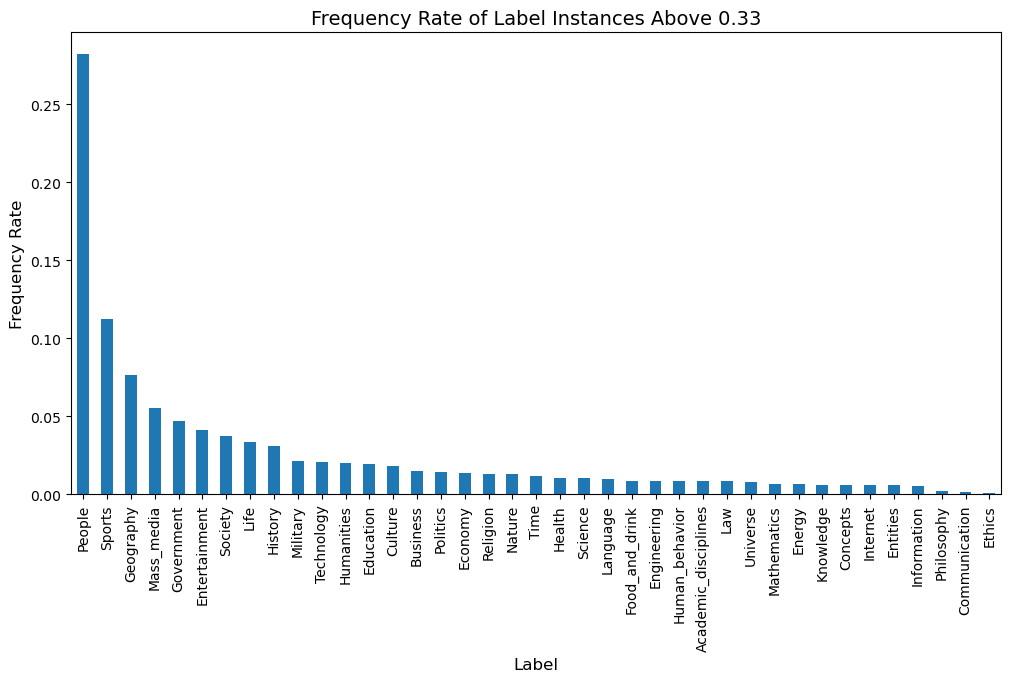

In [70]:
# Calculate the frequency rate
frequency_rate = labels_df_above_0_33.sum() / len(labels_df_above_0_33)
frequency_rate = frequency_rate.sort_values(ascending=False)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Instances Above 0.33')
plt.xlabel('Label')
plt.ylabel('Frequency Rate')
plt.show()

## Label Count Distribution with 0 Threshold

<Figure size 1200x600 with 0 Axes>

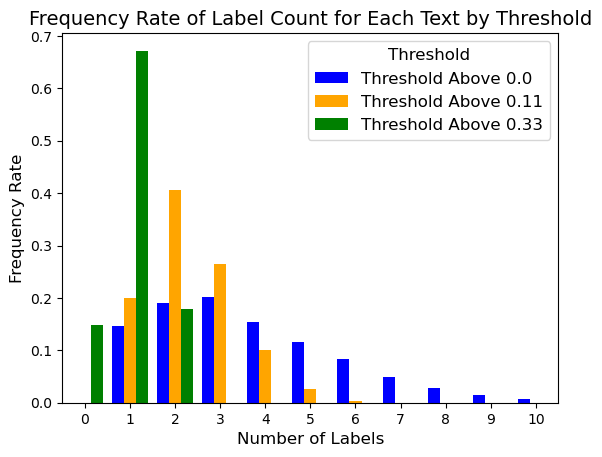

In [71]:
# Calculate the frequency rates for each threshold
label_count_0 = labels_df_above_0.sum(axis=1).value_counts().sort_index()
frequency_rate_0 = label_count_0 / len(labels_df_above_0)

label_count_0_11 = labels_df_above_0_11.sum(axis=1).value_counts().sort_index()
frequency_rate_0_11 = label_count_0_11 / len(labels_df_above_0_11)

label_count_0_33 = labels_df_above_0_33.sum(axis=1).value_counts().sort_index()
frequency_rate_0_33 = label_count_0_33 / len(labels_df_above_0_33)

# Combine the frequency rates into a single DataFrame
combined_df = pd.DataFrame({
    'Threshold Above 0.0': frequency_rate_0,
    'Threshold Above 0.11': frequency_rate_0_11,
    'Threshold Above 0.33': frequency_rate_0_33
}).fillna(0)  # Fill NaN with 0 for plotting purposes

# Plot the combined DataFrame
plt.figure(figsize=(12, 6))
combined_df.plot(kind='bar', color=['blue', 'orange', 'green'], width=0.8)
plt.title('Frequency Rate of Label Count for Each Text by Threshold')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal for better readability
plt.legend(title='Threshold')
plt.xlim(-0.5, 10.5)  # Set x-axis limits to better fit the data
plt.show()

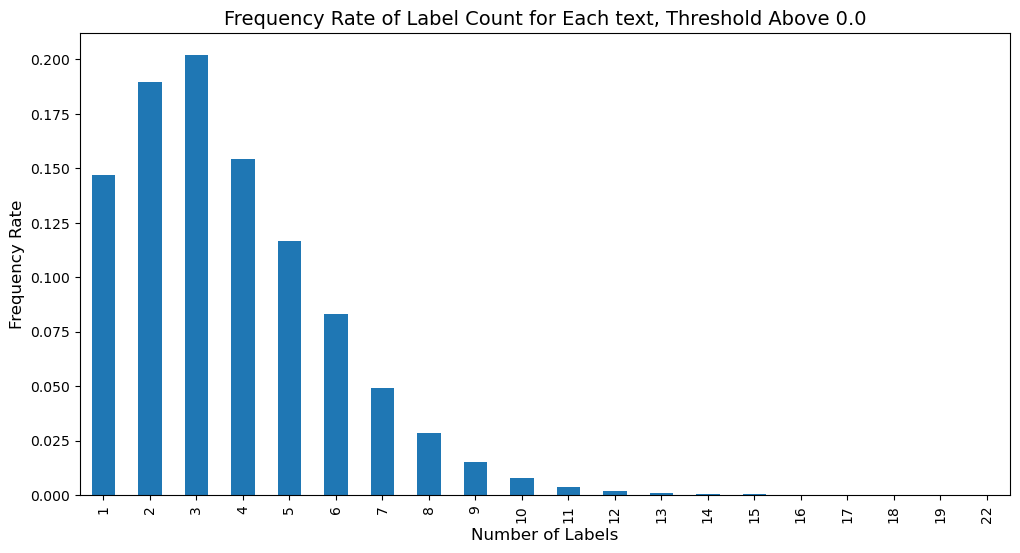

In [72]:
label_count = labels_df_above_0.sum(axis=1).value_counts().sort_index()
frequency_rate = label_count/len(labels_df_above_0)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Count for Each text, Threshold Above 0.0')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.show()

## Label Count Distribution with 0.11 Threshold

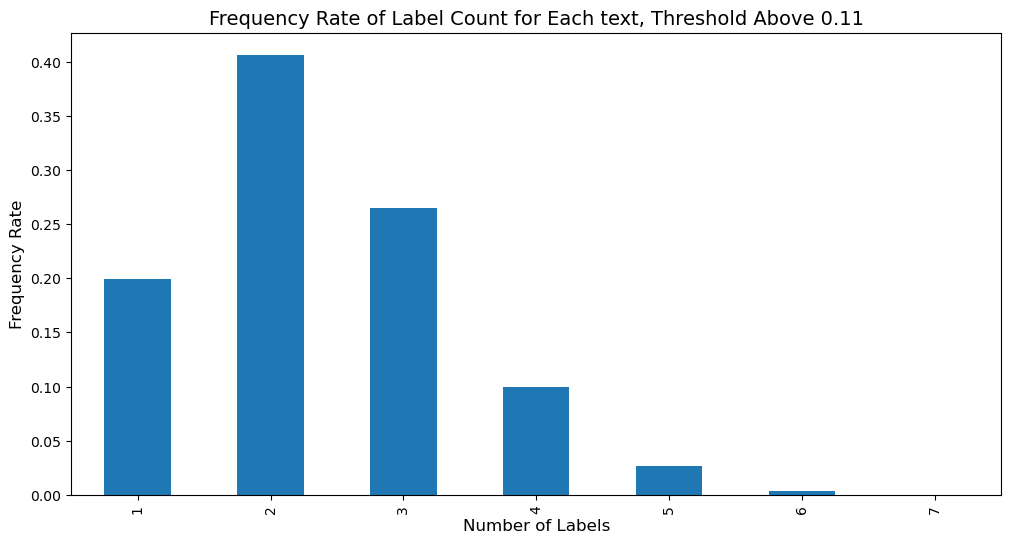

In [73]:
label_count = labels_df_above_0_11.sum(axis=1).value_counts().sort_index()
frequency_rate = label_count/len(labels_df_above_0_11)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Count for Each text, Threshold Above 0.11')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.show()

## Label Count Distribution with 0.33 Threshold

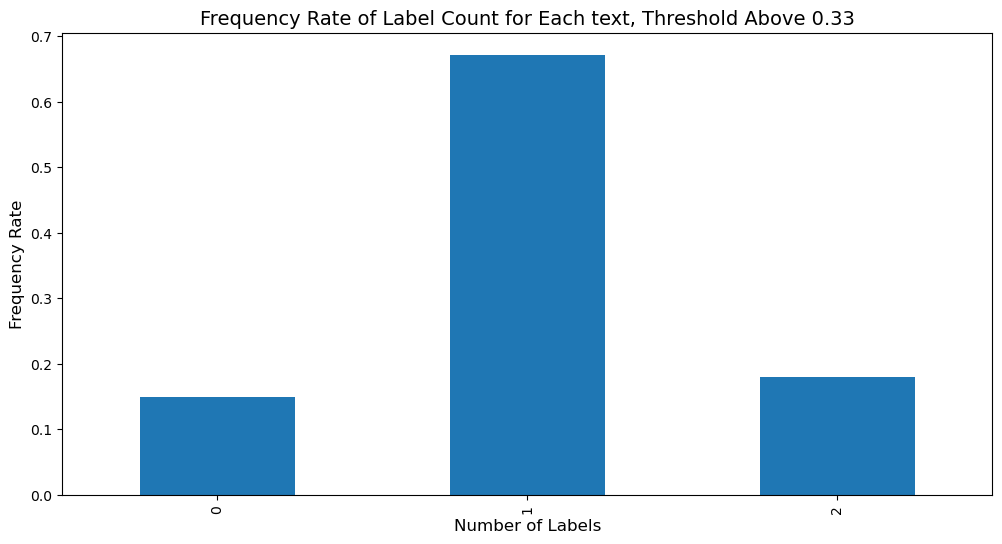

In [74]:
label_count = labels_df_above_0_33.sum(axis=1).value_counts().sort_index()
frequency_rate = label_count/len(labels_df_above_0_33)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Count for Each text, Threshold Above 0.33')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.show()

## Single Topic Probabilty Range
Considering the selected labels in the rows that have a specific topics, looking at the probability of the selected label, we notice they are not always 1 and the minimum value is 0.9. This urges us to use a threshold of more than 0.1 (0.11 or 0.12 selected) for selecting labels.

In [76]:
selected_topic_prob = labels_df[df['topic'] != 'Mixed'].max(axis=1)
selected_topic_prob[selected_topic_prob < 1].shape[0]

670

In [77]:
selected_topic_prob[selected_topic_prob < 1].min()

0.9

## Mix Topic Probability Range

In [78]:
selected_topic_prob = labels_df[df['topic'] == 'Mixed'].max(axis=1)
selected_topic_prob.sort_values(ascending=False).head(5)

59289    0.89
4510     0.89
69034    0.89
36850    0.89
8490     0.89
dtype: float64

# Label Association

In [7]:
def extract_labels(df, max_labels = 3, min_percentage = 0.1):
    labels_df = pd.DataFrame(df['topics_with_percentages'].to_list())
    
    # all elements below min_percentage must turn into 0
    labels_df = labels_df.applymap(lambda x: None if x < min_percentage else x)

    # Extract max_labels greatest values in each row
    labels_df = labels_df.apply(lambda x: x.nlargest(max_labels), axis=1)

    # all non None elements to 1
    labels_df = labels_df.applymap(lambda x: 0 if pd.isnull(x) else 1)

    return labels_df

In [8]:
# Code 1: Process labels_df and calculate Spearman coefficients
labels_df_1 = labels_df.applymap(lambda x: 1 if x > 0.11 else 0)
spearman_corr_1 = labels_df_1.corr(method='spearman').stack().reset_index()
spearman_corr_1.columns = ['Label 1', 'Label 2', 'spearman Coefficient']
spearman_corr_1 = spearman_corr_1[spearman_corr_1['Label 1'] != spearman_corr_1['Label 2']].sort_values(by='spearman Coefficient', ascending=False)
spearman_corr_1['sorted_labels'] = spearman_corr_1.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
spearman_corr_1 = spearman_corr_1.drop_duplicates('sorted_labels').drop('sorted_labels', axis=1)
top_20_labels_1 = spearman_corr_1.head(20).iloc[::-1]

In [22]:
top_20_labels_1['absolute_spearman'] = top_20_labels_1['spearman Coefficient'].abs()
top_20_labels_1.tail(5)

,Label 1,Label 2,spearman Coefficient,absolute_spearman
1166,People,Sports,0.272991,0.272991
584,Geography,Universe,0.366920,0.366920
2,Entertainment,Mass_media,0.443567,0.443567
1117,Nature,Life,0.454266,0.454266
1460,Time,History,0.596791,0.596791


In [10]:
# Code 2: Process df, extract labels, and calculate Spearman coefficients
labels_df_2 = extract_labels(df, min_percentage=0.11)
spearman_corr_2 = labels_df_2.corr(method='spearman').stack().reset_index()
spearman_corr_2.columns = ['Label 1', 'Label 2', 'spearman Coefficient']
spearman_corr_2 = spearman_corr_2[spearman_corr_2['Label 1'] != spearman_corr_2['Label 2']].sort_values(by='spearman Coefficient', ascending=False)
spearman_corr_2['sorted_labels'] = spearman_corr_2.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
spearman_corr_2 = spearman_corr_2.drop_duplicates('sorted_labels').drop('sorted_labels', axis=1)
top_20_labels_2 = spearman_corr_2.head(20).iloc[::-1]

In [24]:
top_20_labels_2['absolute_spearman'] = top_20_labels_2['spearman Coefficient'].abs()
top_20_labels_2.tail(5)

,Label 1,Label 2,spearman Coefficient,absolute_spearman
1394,Sports,People,0.283530,0.283530
545,Geography,Universe,0.304439,0.304439
1459,Time,History,0.390407,0.390407
1116,Nature,Life,0.423963,0.423963
376,Entertainment,Mass_media,0.429363,0.429363


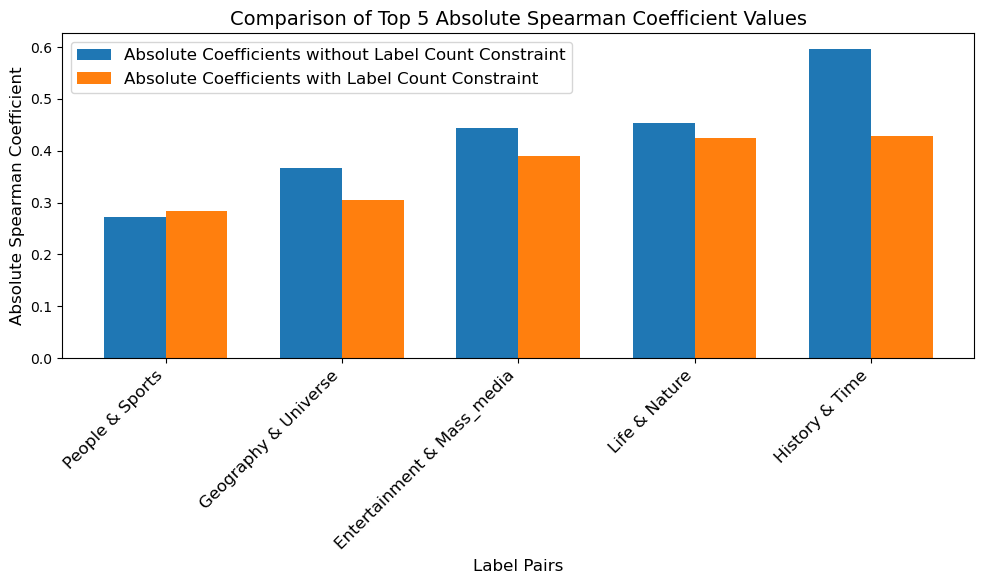

In [30]:
def process_and_get_top_5_abs_spearman(df, threshold=0.11):
    df_processed = df.applymap(lambda x: 1 if x > threshold else 0)
    spearman_corr = df_processed.corr(method='spearman').stack().reset_index()
    spearman_corr.columns = ['Label 1', 'Label 2', 'Spearman Coefficient']
    spearman_corr = spearman_corr[spearman_corr['Label 1'] != spearman_corr['Label 2']]
    spearman_corr['sorted_labels'] = spearman_corr.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
    spearman_corr = spearman_corr.drop_duplicates('sorted_labels').drop('sorted_labels', axis=1)
    top_20_labels = spearman_corr.sort_values(by='Spearman Coefficient', ascending=False).head(20).iloc[::-1]
    top_20_labels['Absolute Spearman'] = top_20_labels['Spearman Coefficient'].abs()
    return top_20_labels.tail(5)

# Set the font sizes
plt.rcParams.update({'font.size': 12})  # Adjust base font size as needed
plt.rcParams['axes.titlesize'] = 14   # Title font size
plt.rcParams['axes.labelsize'] = 12   # Axis labels font size
plt.rcParams['xtick.labelsize'] = 12  # X ticks labels font size
plt.rcParams['ytick.labelsize'] = 10  # Y ticks labels font size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

# Process both dataframes and get top 5 absolute spearman values
top_5_labels_1 = process_and_get_top_5_abs_spearman(labels_df_1)
top_5_labels_2 = process_and_get_top_5_abs_spearman(labels_df_2)

# Prepare data for plotting
labels_1 = top_5_labels_1['Label 1'] + " & " + top_5_labels_1['Label 2']
labels_2 = top_5_labels_2['Label 1'] + " & " + top_5_labels_2['Label 2']
spearman_values_1 = top_5_labels_1['Absolute Spearman']
spearman_values_2 = top_5_labels_2['Absolute Spearman']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(labels_1))

bar1 = ax.bar(index, spearman_values_1, bar_width, label='Absolute Coefficients without Label Count Constraint')
bar2 = ax.bar([i + bar_width for i in index], spearman_values_2, bar_width, label='Absolute Coefficients with Label Count Constraint')

ax.set_xlabel('Label Pairs')
ax.set_ylabel('Absolute Spearman Coefficient')
ax.set_title('Comparison of Top 5 Absolute Spearman Coefficient Values')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels_1, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()

## Spearman Correlation, only Threshold

In [14]:
# if values are more than 0, then assign 1 to it
labels_df = labels_df.applymap(lambda x: 1 if x > 0.11 else 0)

# calculate phi coefficient
spearman_corr = labels_df.corr(method='spearman')

# flatten the matrix
spearman_corr = spearman_corr.stack().reset_index()

# set column names
spearman_corr.columns = ['Label 1', 'Label 2', 'spearman Coefficient']

# filter out the self-correlations
spearman_corr = spearman_corr[spearman_corr['Label 1'] != spearman_corr['Label 2']].sort_values(by='spearman Coefficient', ascending=False)

# remove duplicates
spearman_corr['sorted_labels'] = spearman_corr.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
spearman_corr = spearman_corr.drop_duplicates('sorted_labels')

# drop the sorted_labels column
spearman_corr = spearman_corr.drop('sorted_labels', axis=1)

spearman_corr.head(20)

,Label 1,Label 2,spearman Coefficient
1460,Time,History,0.596791
1117,Nature,Life,0.454266
2,Entertainment,Mass_media,0.443567
584,Geography,Universe,0.366920
1166,People,Sports,0.272991
616,Government,Politics,0.247483
877,Knowledge,Humanities,0.237430
1340,Society,Geography,0.220041
743,Humanities,Mass_media,0.197129
426,Engineering,Technology,0.163036


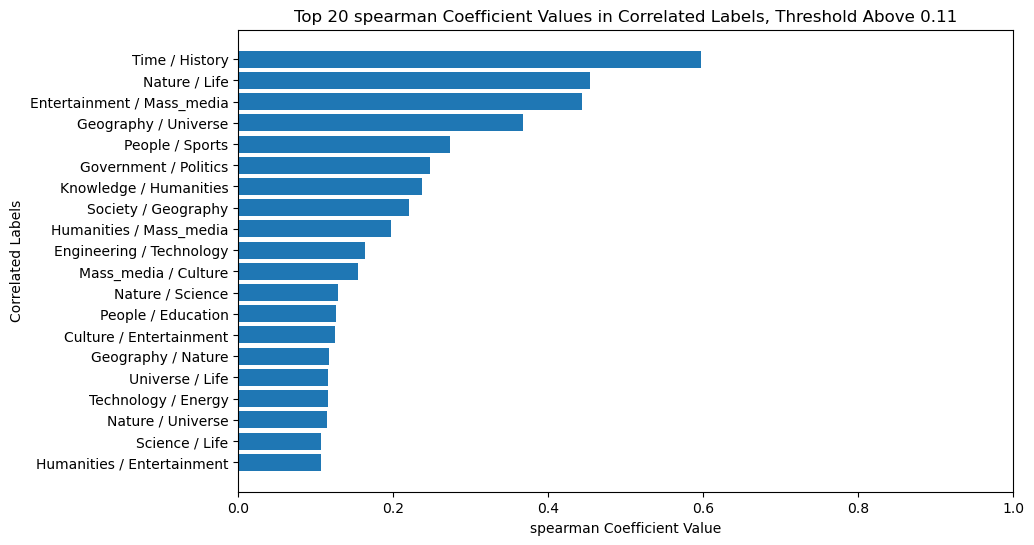

In [15]:
# Convert the tuples to strings
top_20_labels = spearman_corr.head(20)

#reverse the order of the rows
top_20_labels = top_20_labels.iloc[::-1]

# Create a bar plot of the R^2 values
plt.figure(figsize=(10, 6))
plt.barh(top_20_labels['Label 1'] + ' / ' + top_20_labels['Label 2'], top_20_labels['spearman Coefficient'])
plt.xlabel('spearman Coefficient Value')
plt.ylabel('Correlated Labels')
plt.xlim(0, 1)
plt.title('Top 20 spearman Coefficient Values in Correlated Labels, Threshold Above 0.11')
plt.show()

## Spearman Correlation, Threshold and maximum label Constraint

In [17]:
labels_df = extract_labels(df, min_percentage=0.11)

In [18]:
# calculate phi coefficient
spearman_corr = labels_df.corr(method='spearman')

# flatten the matrix
spearman_corr = spearman_corr.stack().reset_index()

# set column names
spearman_corr.columns = ['Label 1', 'Label 2', 'spearman Coefficient']

# filter out the self-correlations
spearman_corr = spearman_corr[spearman_corr['Label 1'] != spearman_corr['Label 2']].sort_values(by='spearman Coefficient', ascending=False)

# remove duplicates
spearman_corr['sorted_labels'] = spearman_corr.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
spearman_corr = spearman_corr.drop_duplicates('sorted_labels')

# drop the sorted_labels column
spearman_corr = spearman_corr.drop('sorted_labels', axis=1)

spearman_corr.head(20)

,Label 1,Label 2,spearman Coefficient
376,Entertainment,Mass_media,0.429363
1116,Nature,Life,0.423963
1459,Time,History,0.390407
545,Geography,Universe,0.304439
1394,Sports,People,0.283530
577,Government,Politics,0.220346
837,Knowledge,Humanities,0.215956
541,Geography,Society,0.215697
727,Humanities,Mass_media,0.183282
1137,People,Education,0.135207


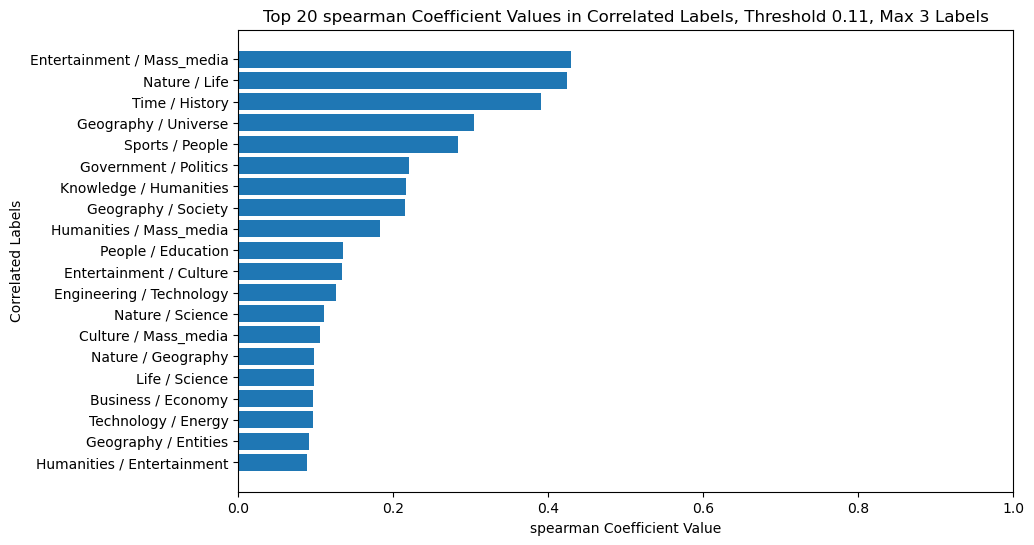

In [19]:
# Convert the tuples to strings
top_20_labels = spearman_corr.head(20)

#reverse the order of the rows
top_20_labels = top_20_labels.iloc[::-1]

# Create a bar plot of the R^2 values
plt.figure(figsize=(10, 6))
plt.barh(top_20_labels['Label 1'] + ' / ' + top_20_labels['Label 2'], top_20_labels['spearman Coefficient'])
plt.xlabel('spearman Coefficient Value')
plt.ylabel('Correlated Labels')
plt.xlim(0, 1)
plt.title('Top 20 spearman Coefficient Values in Correlated Labels, Threshold 0.11, Max 3 Labels')
plt.show()